In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('/home/ataur/Downloads/Datasets_PCA_Problem Statement/heart disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

# Outlier Treatment

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

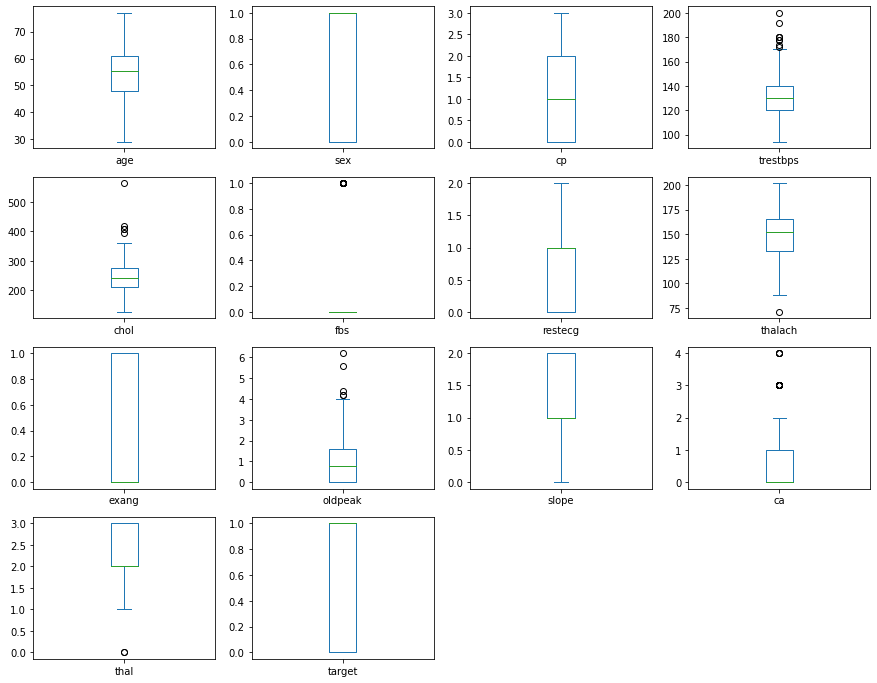

In [10]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(15,12))

In [11]:
# first Column
iqr = df['trestbps'].quantile(0.75) - df['trestbps'].quantile(0.25)
iqr

20.0

In [12]:
lower_limit = df['trestbps'].quantile(0.25) - 1.5*(iqr)
lower_limit

90.0

In [13]:
upper_limit = df['trestbps'].quantile(0.75) + 1.5*(iqr)
upper_limit

170.0

In [14]:
df['trestbps'] = np.where(df['trestbps'] > upper_limit, upper_limit, np.where(df['trestbps'] < lower_limit, lower_limit, df['trestbps']))

In [15]:
# Second Column
iqr = df['chol'].quantile(0.75) - df['chol'].quantile(0.25)
iqr

63.75

In [16]:
lower_limit = df['chol'].quantile(0.25) - 1.5*(iqr)
lower_limit

115.375

In [17]:
upper_limit = df['chol'].quantile(0.75) + 1.5*(iqr)
upper_limit

370.375

In [18]:
df['chol'] = np.where(df['chol'] > upper_limit, upper_limit, np.where(df['chol'] < lower_limit, lower_limit, df['chol']))

In [19]:
# Third Column
iqr = df['thalach'].quantile(0.75) - df['thalach'].quantile(0.25)
iqr

32.75

In [20]:
lower_limit = df['thalach'].quantile(0.25) - 1.5*(iqr)
lower_limit

84.125

In [21]:
upper_limit = df['thalach'].quantile(0.75) + 1.5*(iqr)
upper_limit

215.125

In [22]:
df['thalach'] = np.where(df['thalach'] > upper_limit, upper_limit, np.where(df['thalach'] < lower_limit, lower_limit, df['thalach']))

In [23]:
# Forth Column
iqr = df['oldpeak'].quantile(0.75) - df['oldpeak'].quantile(0.25)
iqr

1.6

In [24]:
lower_limit = df['oldpeak'].quantile(0.25) - 1.5*(iqr)
lower_limit

-2.4000000000000004

In [25]:
upper_limit = df['oldpeak'].quantile(0.75) + 1.5*(iqr)
upper_limit

4.0

In [26]:
df['oldpeak'] = np.where(df['oldpeak'] > upper_limit, upper_limit, np.where(df['oldpeak'] < lower_limit, lower_limit, df['oldpeak']))

In [27]:
# Fifth Column
iqr = df['ca'].quantile(0.75) - df['ca'].quantile(0.25)
iqr

1.0

In [28]:
lower_limit = df['ca'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.5

In [29]:
upper_limit = df['ca'].quantile(0.75) + 1.5*(iqr)
upper_limit

2.5

In [30]:
df['ca'] = np.where(df['ca'] > upper_limit, upper_limit, np.where(df['ca'] < lower_limit, lower_limit, df['ca']))

In [31]:
# Sixth Column
iqr = df['thal'].quantile(0.75) - df['thal'].quantile(0.25)
iqr

1.0

In [32]:
lower_limit = df['thal'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.5

In [33]:
upper_limit = df['thal'].quantile(0.75) + 1.5*(iqr)
upper_limit

4.5

In [34]:
df['thal'] = np.where(df['thal'] > upper_limit, upper_limit, np.where(df['thal'] < lower_limit, lower_limit, df['thal']))

In [35]:
# Seven Column
iqr = df['fbs'].quantile(0.75) - df['fbs'].quantile(0.25)
iqr

0.0

In [36]:
lower_limit = df['fbs'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.0

In [37]:
upper_limit = df['fbs'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.0

In [38]:
df['fbs'] = np.where(df['fbs'] > upper_limit, upper_limit, np.where(df['fbs'] < lower_limit, lower_limit, df['fbs']))

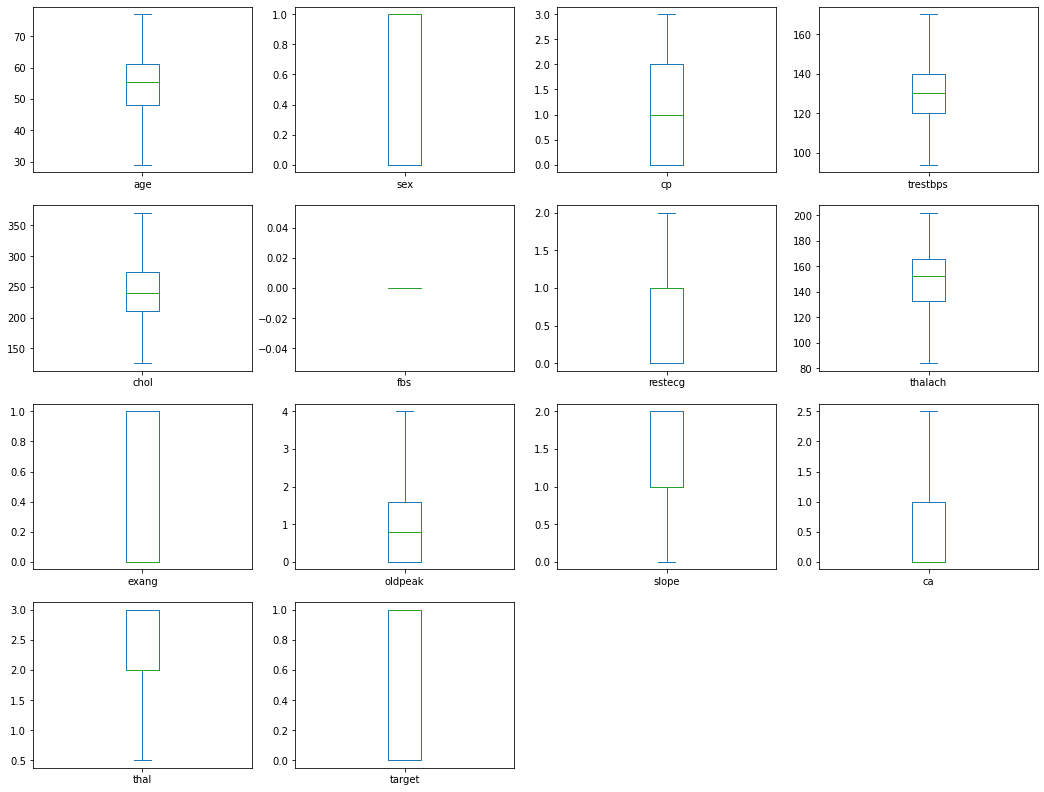

In [39]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(18,14));

# spliting Data

In [50]:
x = df.iloc[:, [0,2,3,6,7,9,11,12,13]]

In [51]:
y = df.iloc[:, [1,4,8,10]]

In [52]:
y

,sex,chol,exang,slope
0,1,233.0,0,0
1,1,250.0,0,0
2,0,204.0,0,2
3,1,236.0,0,2
4,0,354.0,1,2
...,...,...,...,...
298,0,241.0,1,1
299,1,264.0,0,1
300,1,193.0,0,1
301,1,131.0,1,1


# Normalization

In [53]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [54]:
y_norm = norm_func(y)

In [55]:
y_norm

,sex,chol,exang,slope
0,1.0,0.437852,0.0,0.0
1,1.0,0.507417,0.0,0.0
2,0.0,0.319182,0.0,1.0
3,1.0,0.450128,0.0,1.0
4,0.0,0.932992,1.0,1.0
...,...,...,...,...
298,0.0,0.470588,1.0,0.5
299,1.0,0.564706,0.0,0.5
300,1.0,0.274169,0.0,0.5
301,1.0,0.020460,1.0,0.5


# Joining data for Clustering

In [56]:
xy = pd.concat([x, y_norm], axis=1)

In [57]:
xy

,age,cp,trestbps,restecg,thalach,oldpeak,ca,thal,target,sex,chol,exang,slope
0,63,3,145.0,0,150.0,2.3,0.0,1.0,1,1.0,0.437852,0.0,0.0
1,37,2,130.0,1,187.0,3.5,0.0,2.0,1,1.0,0.507417,0.0,0.0
2,41,1,130.0,0,172.0,1.4,0.0,2.0,1,0.0,0.319182,0.0,1.0
3,56,1,120.0,1,178.0,0.8,0.0,2.0,1,1.0,0.450128,0.0,1.0
4,57,0,120.0,1,163.0,0.6,0.0,2.0,1,0.0,0.932992,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,1,123.0,0.2,0.0,3.0,0,0.0,0.470588,1.0,0.5
299,45,3,110.0,1,132.0,1.2,0.0,3.0,0,1.0,0.564706,0.0,0.5
300,68,0,144.0,1,141.0,3.4,2.0,3.0,0,1.0,0.274169,0.0,0.5
301,57,0,130.0,1,115.0,1.2,1.0,3.0,0,1.0,0.020460,1.0,0.5


# Scree plot

In [59]:
twss = []

In [58]:
k = list(range(2,9))

In [60]:
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(xy)
    twss.append(kmeans.inertia_)

In [61]:
twss

[157240.7926986228,
 117097.48275203447,
 92194.84430724489,
 79902.99178850876,
 70050.64700057398,
 61869.82129858287,
 56226.884876098295]

Text(0, 0.5, 'Total Within ss')

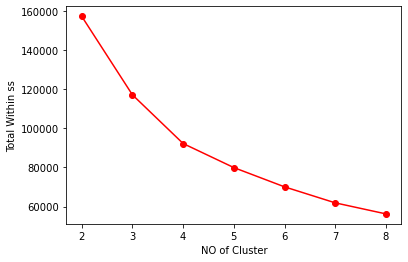

In [62]:
plt.plot(k, twss, 'ro-');plt.xlabel('NO of Cluster');plt.ylabel('Total Within ss')

In [63]:
model = KMeans(n_clusters=3)
model.fit(xy)

KMeans(n_clusters=3)

In [64]:
model.labels_

array([2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0,
       1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1,
       2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0,
       0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0,

In [65]:
c = pd.Series(model.labels_)

In [66]:
df['Clust'] = c

In [67]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Clust
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1,2.0
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1,1.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1,1.0
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1,1.0
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0,0.0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0,2.0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,0,0.0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0,1.0


In [69]:
df = df.iloc[:, [14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [70]:
df

,Clust,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2.0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,1.0,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,1.0,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,1.0,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,1.0,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,2.0,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,0.0,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,0
301,1.0,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [71]:
df.isnull().sum()

Clust       1
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [72]:
df.dropna()

,Clust,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2.0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,1.0,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,1.0,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,1.0,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,1.0,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.0,59,1,0,164.0,176.0,0.0,0,90.0,0,1.0,1,2.0,1.0,0
298,0.0,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,2.0,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,0.0,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,0


In [73]:
df.iloc[:,1:].groupby(df['Clust']).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Clust,,,,,,,,,,,,,,
0.0,57.595745,0.659574,0.563830,130.744681,245.018617,0.0,0.478723,134.978723,0.489362,1.332979,1.265957,0.994681,2.436170,0.287234
1.0,50.682171,0.682171,1.108527,125.612403,244.088178,0.0,0.589147,160.132752,0.217054,0.717054,1.511628,0.426357,2.232558,0.759690
2.0,56.743590,0.717949,1.205128,141.230769,248.060897,0.0,0.487179,149.538462,0.320513,1.187179,1.371795,0.660256,2.320513,0.500000


In [75]:
df.iloc[:,1:].groupby(df['Clust']).median()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Clust,,,,,,,,,,,,,,
0.0,58.0,1.0,0.0,130.0,243.5,0.0,0.0,137.0,0.0,1.15,1.0,1.0,3.0,0.0
1.0,51.0,1.0,1.0,126.0,240.0,0.0,1.0,163.0,0.0,0.30,2.0,0.0,2.0,1.0
2.0,58.0,1.0,1.0,140.0,243.0,0.0,0.0,151.0,0.0,1.00,1.0,0.0,2.0,0.5


In [76]:
df.iloc[:,1:].groupby(df['Clust']).std()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Clust,,,,,,,,,,,,,,
0.0,7.845715,0.476393,0.945374,16.377887,50.825524,0.0,0.543361,19.714619,0.502567,1.238573,0.552132,0.914326,0.660865,0.454898
1.0,8.905743,0.467448,0.920600,13.091809,46.476694,0.0,0.493907,21.837422,0.413847,0.938260,0.626452,0.788345,0.507931,0.428938
2.0,8.518027,0.452911,1.177263,17.733908,45.746761,0.0,0.552294,17.587401,0.469694,1.090259,0.646850,0.869742,0.654526,0.503236
